In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parsing simulation history files
In the `simulate/LOGS` directory, all of the simulation output files are stored (one directory per thread).

The first five lines are not needed, so we will skip them.
The sixth line is the header, which contains the column names.
The last line is the latest output, which contains the final values.

In [2]:
SOLAR_MASS = 1.989 * 10 ** 30  # kg
SOLAR_RADIUS = 696340 * 1000  # m

headers = ['source_id', 'radius', 'mass', 'age', 'y', 'z', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'core_radius',
           'H', 'He3', 'He', 'C', 'N', 'O', 'Ne', 'Mg']
output = []

for directory in os.scandir('simulate/LOGS'):
    dir_name = directory.name
    thread_num = int(dir_name.split('/')[-1])
    data = pd.read_csv(f'simulate/run/{thread_num}/data.csv', dtype={'source_id': str})  # Source data
    glob = Path(f'simulate/LOGS/{dir_name}/').rglob('history_*.data')

    idx = 0
    for file in glob:
        with open(file, 'r') as f:
            lines = f.readlines()

            # Skip the first five lines
            lines = lines[5:]
            header = lines[0]
            last_line = lines[-1]

            if last_line.strip() == '':
                last_line = lines[-2]  # -1 is just whitespace

            while header.count('  ') > 0:
                header = header.replace('  ', ' ')

            while last_line.count('  ') > 0:
                last_line = last_line.replace('  ', ' ')

            header = header.strip()
            last_line = last_line.strip()

            header = header.split()
            last_line = last_line.split()
            df = pd.DataFrame([last_line], columns=header)
            row = data.iloc[idx]

            core_radius = 0

            for i in range(1, 10):
                burn_type = int(df[f'burn_relr_type_{i}'].iloc[-1])
                val = float(df[f'burn_relr_top_{i}'].iloc[-1])
                if burn_type != -9999 and val != 1 and val > 0:
                    core_radius = df[f'burn_relr_top_{i}'].iloc[-1]

            core_radius = float(core_radius) * row['radius'] * SOLAR_RADIUS * 100  # Convert RSun to cm

            dat = [row['source_id'], row['radius'], row['mass'], row['age'], row['y'], row['z'],
                   float(df['log_cntr_P'].iloc[-1]), float(df['log_cntr_Rho'].iloc[-1]),
                   float(df['log_cntr_T'].iloc[-1]), core_radius, float(df['center_h1'].iloc[-1]),
                   float(df['center_he3'].iloc[-1]), float(df['center_he4'].iloc[-1]),
                   float(df['center_c12'].iloc[-1]), float(df['center_n14'].iloc[-1]), float(df['center_o16'].iloc[-1]),
                   float(df['center_ne20'].iloc[-1]), float(df['center_mg24'].iloc[-1])]
            output.append(dat)
            idx += 1

df = pd.DataFrame(output, columns=headers)
df.set_index('source_id', inplace=True)
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,He3,He,C,N,O,Ne,Mg
source_id,,,,,,,,,,,,,,,,,
2268469823008193152,0.8730,0.823140,1.299812e+10,0.299962,0.026982,17.573710,2.490047,7.217228,1.140741e+10,1.000875e-01,5.849207e-07,0.872411,0.000037,0.008496,0.010654,0.002813,0.005501
2264752202396093440,0.8196,0.815044,1.114927e+10,0.281967,0.018413,17.371147,2.258739,7.150436,1.171614e+10,2.795199e-01,1.255734e-05,0.701542,0.000015,0.004711,0.008526,0.001920,0.003754
2268625472622936832,0.9562,0.906775,9.327484e+09,0.292177,0.023275,17.246639,2.148876,7.093921,1.339443e+10,3.708326e-01,4.240323e-05,0.604698,0.000015,0.005968,0.011127,0.002476,0.004841
2266607387750059648,0.8635,0.857668,9.406262e+09,0.293008,0.023670,17.500147,2.372402,7.228060,1.154711e+10,1.585406e-01,1.090649e-06,0.821062,0.000031,0.006814,0.007365,0.002094,0.004094
2265008732201710848,0.9020,0.919691,6.044249e+09,0.290172,0.022320,17.632781,2.557249,7.262118,1.119048e+10,2.029121e-02,6.886867e-09,0.954371,0.000057,0.010920,0.006571,0.002636,0.005154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624951321275777792,1.6390,1.232901,4.315361e+09,0.308037,0.030827,17.270882,2.031702,7.168689,2.469893e+10,5.347471e-01,2.081014e-05,0.445261,0.000017,0.004994,0.008972,0.002026,0.003962
4623617648031255936,0.9089,0.925471,5.983663e+09,0.294636,0.024446,17.487001,2.373754,7.207159,1.230934e+10,1.701368e-01,2.036724e-06,0.802103,0.000033,0.008032,0.011325,0.002831,0.005537
4623814907288996864,0.9575,0.849973,1.167721e+10,0.307684,0.030659,18.115942,3.018181,7.279359,9.367396e+09,8.563457e-09,7.156343e-22,0.974595,0.000065,0.011862,0.005630,0.002656,0.005193


In [3]:
past_data = ['sim_batch_500', 'sim_batch_1500', 'sim_batch_2000']
exists = 0
for batch in past_data:
    for directory in os.scandir(f'simulate/{batch}'):
        dir_name = directory.name
        glob = Path(f'simulate/{batch}/{dir_name}').rglob('history_*.data')

        output = []
        star_sources = pd.read_csv(f'simulate/{batch}/{dir_name}/data.csv', dtype={'source_id': str})

        idx = 0
        for file in glob:
            with open(file, 'r') as f:
                lines = f.readlines()

                # Skip the first five lines
                lines = lines[5:]
                header = lines[0]
                last_line = lines[-1]

                if last_line.strip() == '':
                    last_line = lines[-2]  # -1 is just whitespace

                while header.count('  ') > 0:
                    header = header.replace('  ', ' ')

                while last_line.count('  ') > 0:
                    last_line = last_line.replace('  ', ' ')

                header = header.strip()
                last_line = last_line.strip()

                header = header.split()
                last_line = last_line.split()
                sim_results = pd.DataFrame([last_line], columns=header)
                row = star_sources.iloc[idx]

                core_radius = 0

                for i in range(1, 10):
                    burn_type = int(sim_results[f'burn_relr_type_{i}'].iloc[-1])
                    val = float(sim_results[f'burn_relr_top_{i}'].iloc[-1])
                    if burn_type != -9999 and val != 1 and val > 0:
                        core_radius = sim_results[f'burn_relr_top_{i}'].iloc[-1]

                core_radius = float(core_radius) * row['radius'] * 6.96e10  # Convert RSun to cm

                dat = [row['radius'], row['mass'], row['age'], row['y'], row['z'],
                       float(sim_results['log_cntr_P'].iloc[-1]), float(sim_results['log_cntr_Rho'].iloc[-1]),
                       float(sim_results['log_cntr_T'].iloc[-1]), core_radius, float(sim_results['center_h1'].iloc[-1]),
                       float(sim_results['center_he3'].iloc[-1]), float(sim_results['center_he4'].iloc[-1]),
                       float(sim_results['center_c12'].iloc[-1]), float(sim_results['center_n14'].iloc[-1]),
                       float(sim_results['center_o16'].iloc[-1]), float(sim_results['center_ne20'].iloc[-1]),
                       float(sim_results['center_mg24'].iloc[-1])]

                if row['source_id'] in df.index:
                    exists += 1

                df.loc[row['source_id']] = dat
                idx += 1

In [4]:
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,He3,He,C,N,O,Ne,Mg
source_id,,,,,,,,,,,,,,,,,
3251551003422693888,2.5292,1.510115,2.377280e+09,0.286034,0.020350,17.377947,2.135835,7.321662,2.638960e+10,0.203766,5.163113e-07,0.775738,0.000061,0.010516,0.003547,0.002156,0.004216
1303402456987746688,1.2349,1.166904,2.632037e+09,0.280722,0.017820,20.557883,4.805332,7.518378,2.191578e+09,0.000000,0.000000e+00,0.980109,0.000091,0.012207,0.001323,0.002121,0.004149
4799257105785823104,1.1145,0.958356,9.737840e+09,0.282900,0.018857,17.421609,2.176667,7.265834,1.430647e+10,0.318694,2.637053e-06,0.663308,0.000033,0.006766,0.005706,0.001858,0.003633
1628627894720711680,1.3399,1.177115,3.550026e+09,0.290197,0.022332,17.638718,2.560559,7.267042,1.650763e+10,0.016569,3.992731e-09,0.961478,0.000053,0.009994,0.005134,0.002291,0.004480
1633969597087497600,1.6040,1.477897,1.135234e+09,0.294217,0.024246,17.381918,2.083997,7.269853,2.043402e+10,0.429593,4.800595e-06,0.551807,0.000031,0.006469,0.006442,0.001912,0.003739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866931696930862336,0.7405,0.796502,4.279742e+09,0.280678,0.017799,17.459409,2.270677,7.369138,6.881168e+09,0.035357,4.266629e-09,0.943401,0.000085,0.012340,0.002151,0.002255,0.004410
1223383230533716736,1.3845,1.075874,6.449291e+09,0.295050,0.024643,17.409955,2.154391,7.281455,1.693771e+10,0.309385,2.336686e-06,0.668994,0.000042,0.008329,0.006643,0.002235,0.004370
1505960158413599360,2.2513,1.447137,2.815454e+09,0.286625,0.020631,17.384299,2.139352,7.242811,3.021307e+10,0.369408,4.387871e-06,0.610313,0.000031,0.006724,0.007371,0.002080,0.004068


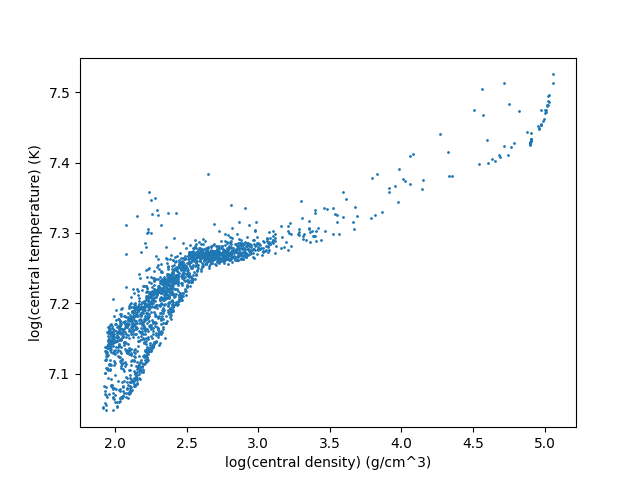

In [3]:
%matplotlib widget

fig, ax = plt.subplots()

ax.scatter(df['log_cntr_Rho'], df['log_cntr_T'], s=1)
ax.set_xlabel('log(central density) (g/cm^3)')
ax.set_ylabel('log(central temperature) (K)')

plt.show()

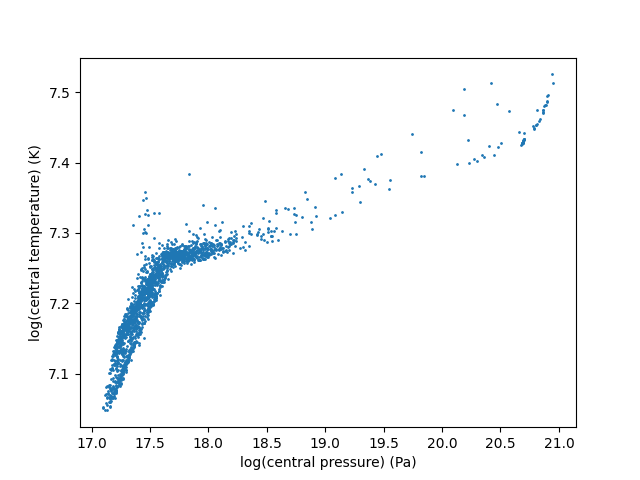

In [4]:
%matplotlib widget
fig, ax = plt.subplots()

ax.scatter(df['log_cntr_P'], df['log_cntr_T'], s=1)
ax.set_xlabel('log(central pressure) (Pa)')
ax.set_ylabel('log(central temperature) (K)')

plt.show()

## 3D plot

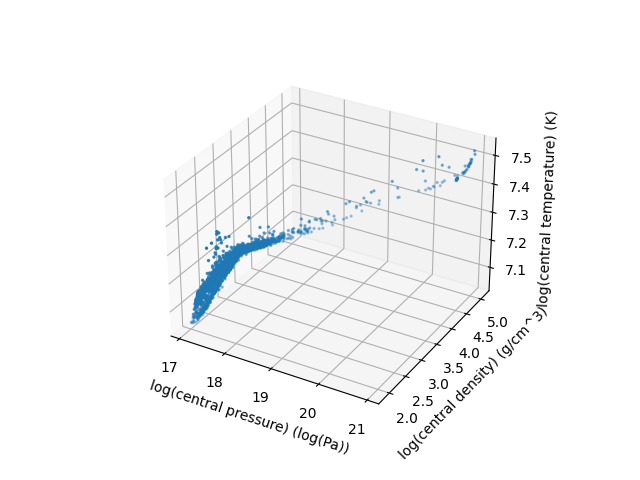

In [5]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['log_cntr_P'], df['log_cntr_Rho'], df['log_cntr_T'], s=2)
ax.set_xlabel('log(central pressure) (log(Pa))')
ax.set_ylabel('log(central density) (g/cm^3)')
ax.set_zlabel('log(central temperature) (K)')

plt.show()

## Process stellar core data
We need to determine the gravitational energy per atom of the stellar core as well as the thermal energy per atom.

For this, we will obviously need the number of atoms.
We have mass fracs for the core as well as the core radius (as a fraction of the star's radius) and the density.
With these, we can calculate the number of atoms in the core.

### First, we need the various masses of the elements

In [3]:
HYDROGEN_MASS = 1.00784
HELIUM_3_MASS = 3.016029
HELIUM_MASS = 4.002602
CARBON_MASS = 12.011
NITROGEN_MASS = 14.0067
OXYGEN_MASS = 15.999
NEON_MASS = 20.1797
SODIUM_MASS = 22.989769
MAGNESIUM_MASS = 24.305
ALUMINUM_MASS = 26.981539
SILICON_MASS = 28.0855
SUlFUR_MASS = 32.065
POTASSIUM_MASS = 39.0983
CALCIUM_MASS = 40.078
TITANIUM_MASS = 47.867
CHROMIUM_MASS = 51.9961
MANGANESE_MASS = 54.938044
IRON_MASS = 55.845
NICKEL_MASS = 58.6934

masses = {
    'H': HYDROGEN_MASS,
    'He3': HELIUM_MASS,
    'He': HELIUM_MASS,
    'C': CARBON_MASS,
    'N': NITROGEN_MASS,
    'O': OXYGEN_MASS,
    'Ne': NEON_MASS,
    'Na': SODIUM_MASS,
    'Mg': MAGNESIUM_MASS,
    'Al': ALUMINUM_MASS,
    'Si': SILICON_MASS,
    'K': POTASSIUM_MASS,
    'Ca': CALCIUM_MASS,
    'Ti': TITANIUM_MASS,
    'Cr': CHROMIUM_MASS,
    'Mn': MANGANESE_MASS,
    'Fe': IRON_MASS,
    'Ni': NICKEL_MASS,
}

SPECTROSCOPY_ATOMS = ['C', 'O', 'N', 'Ne', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Cr', 'Mn', 'Fe', 'Ni']

ATOMIC_UNIT = 1.6605402e-24  # gram

G = 6.67430e-11  # Gravitational constant
k = 1.380649e-23 * 6241509074461  # Boltzmann constant (MeV/K)

### Now we can run our calculations
We can use the following formula to calculate the number of atoms in the core:

![n = summation((M * X_Q)/m_Q)](imgs/latex_num_atoms.png)

Where:

*n* 	=	The number of atoms

*Q*	    =	The atom type, one of Hydrogen, Helium 3, Helium 4, Carbon, Nitrogen, Oxygen, Neon, or Magnesium

*M*	    =	Core mass obtained from density (ρ • V) in grams.

*X_Q*	=	Core mass fraction of the given atom Q

*m_Q*	=	Atomic mass in grams of the given atom Q


Using this quantity *n*, we can calculate the gravitational energy per atom of the stellar core as well as the thermal energy per atom.

For PAGE (Per-Atom Gravitational Energy), we will use the following formula:

![E_atom = -3/5 * G * M^2 / r * n](imgs/latex_energy_atom.png)

Where:

*E_atom*	=   	Energy per atom in Joules (for calculation purposes, this quantity was converted from Joules to Megaelectron-volts)

*G*     	=	    Gravitational constant

*M*        	=	    Core mass in grams

*r*   	    =	    Core radius in meters

*n*	        =	    Number of atoms in the core

Finally, we can calculate the average atomic mass of the core.

We will use the following formula:

![m_bar = sum(m_Q * X_Q)](imgs/latex_average_atomic_mass.png)

Where:

*m_bar*	    =   	Average atomic mass

*Q*     	=   	Type of atom, one of Hydrogen, Helium 3, Helium 4, Carbon, Nitrogen, Oxygen, Neon, or Magnesium

*m_Q*    	=	    Mass of the given atom Q

*X_Q*	    =	    Core mass fraction of the given atom Q

In [4]:
def get_core_atom_count(mass_fracs: dict[str, float], radius: float, density: float) -> int:
    """
    Calculate the number of atoms in a core based on mass fractions and density.
    :param mass_fracs: List of mass fractions for each element
    :param radius: Radius in cm
    :param density: Density in g/cm^3
    :return: 
    """
    atom_count = 0
    core_mass = density * (4 / 3 * np.pi * pow(radius, 3))
    for (atom, mass_frac) in mass_fracs.items():
        abs_mass_part = core_mass * mass_frac  # Absolute mass of the element in grams
        atom_count += abs_mass_part / (masses[atom] * ATOMIC_UNIT)
    return atom_count


def get_core_atom_count_row(row):
    mass_fracs = {
        'H': row['H'],
        'He3': row['He3'],
        'He': row['He'],
        'C': row['C'],
        'N': row['N'],
        'O': row['O'],
        'Ne': row['Ne'],
        'Mg': row['Mg']
    }

    return get_core_atom_count(mass_fracs, row['core_radius'], 10 ** row['log_cntr_Rho'])


def get_average_atomic_mass(row):
    mass_fracs = {
        'H': row['H'],
        'He3': row['He3'],
        'He': row['He'],
        'C': row['C'],
        'N': row['N'],
        'O': row['O'],
        'Ne': row['Ne'],
        'Mg': row['Mg']
    }

    avg_atom_mass = 0
    for (atom, mass_frac) in mass_fracs.items():
        avg_atom_mass += mass_frac * masses[atom]

    return avg_atom_mass


df['core_mass'] = 10 ** df['log_cntr_Rho'] * (4 / 3 * np.pi * pow(df['core_radius'], 3))  # grams
df['core_atom_count'] = df.apply(get_core_atom_count_row, axis=1)  # Dimensionless
df['per_atom_gravitational_energy'] = np.abs(-3 / 5 * G * pow(df['core_mass'] / 1000, 2) / (df['core_radius'] / 100)) / \
                                      df['core_atom_count'] * 6241509074461  # MeV/atom
df['core_average_atomic_mass'] = df.apply(get_average_atomic_mass, axis=1)  # AMU
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,...,He,C,N,O,Ne,Mg,core_mass,core_atom_count,per_atom_gravitational_energy,core_average_atomic_mass
source_id,,,,,,,,,,,,,,,,,,,,,
2268469823008193152,0.8730,0.823140,1.299812e+10,0.299962,0.026982,17.573710,2.490047,7.217228,1.140741e+10,1.000875e-01,...,0.872411,0.000037,0.008496,0.010654,0.002813,0.005501,1.921747e+33,3.690769e+56,0.021925,4.073145
2264752202396093440,0.8196,0.815044,1.114927e+10,0.281967,0.018413,17.371147,2.258739,7.150436,1.171614e+10,2.795199e-01,...,0.701542,0.000015,0.004711,0.008526,0.001920,0.003754,1.222310e+33,3.339944e+56,0.009543,3.422300
2268625472622936832,0.9562,0.906775,9.327484e+09,0.292177,0.023275,17.246639,2.148876,7.093921,1.339443e+10,3.708326e-01,...,0.604698,0.000015,0.005968,0.011127,0.002476,0.004841,1.418199e+33,4.445199e+56,0.008443,3.223698
2266607387750059648,0.8635,0.857668,9.406262e+09,0.293008,0.023670,17.500147,2.372402,7.228060,1.154711e+10,1.585406e-01,...,0.821062,0.000031,0.006814,0.007365,0.002094,0.004094,1.520233e+33,3.329336e+56,0.015026,3.801558
2265008732201710848,0.9020,0.919691,6.044249e+09,0.290172,0.022320,17.632781,2.557249,7.262118,1.119048e+10,2.029121e-02,...,0.954371,0.000057,0.010920,0.006571,0.002636,0.005154,2.117795e+33,3.317337e+56,0.030198,4.277637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624951321275777792,1.6390,1.232901,4.315361e+09,0.308037,0.030827,17.270882,2.031702,7.168689,2.469893e+10,5.347471e-01,...,0.445261,0.000017,0.004994,0.008972,0.002026,0.003962,6.789310e+33,2.629052e+57,0.017743,2.672097
4623617648031255936,0.9089,0.925471,5.983663e+09,0.294636,0.024446,17.487001,2.373754,7.207159,1.230934e+10,1.701368e-01,...,0.802103,0.000033,0.008032,0.011325,0.002831,0.005537,1.847340e+33,4.125810e+56,0.016796,3.867773
4623814907288996864,0.9575,0.849973,1.167721e+10,0.307684,0.030659,18.115942,3.018181,7.279359,9.367396e+09,8.563457e-09,...,0.974595,0.000065,0.011862,0.005630,0.002656,0.005193,3.590260e+33,5.298012e+56,0.064918,4.337722


## Calculate the thermal energy per atom
We can calculate the thermal energy per atom using the following formula:

![E_thermal = 3/2 * k_B * T](imgs/latex_energy_thermal.png)

Where:

*k_B* = Boltzmann constant

*T* = Temperature of the star in Kelvin

*E_thermal* = Thermal energy per atom in MeV

In [5]:
df['per_atom_thermal_energy'] = (3 / 2 * k * (10 ** df['log_cntr_T']))  # MeV/atom
df

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,...,C,N,O,Ne,Mg,core_mass,core_atom_count,per_atom_gravitational_energy,core_average_atomic_mass,per_atom_thermal_energy
source_id,,,,,,,,,,,,,,,,,,,,,
2268469823008193152,0.8730,0.823140,1.299812e+10,0.299962,0.026982,17.573710,2.490047,7.217228,1.140741e+10,1.000875e-01,...,0.000037,0.008496,0.010654,0.002813,0.005501,1.921747e+33,3.690769e+56,0.021925,4.073145,0.002132
2264752202396093440,0.8196,0.815044,1.114927e+10,0.281967,0.018413,17.371147,2.258739,7.150436,1.171614e+10,2.795199e-01,...,0.000015,0.004711,0.008526,0.001920,0.003754,1.222310e+33,3.339944e+56,0.009543,3.422300,0.001828
2268625472622936832,0.9562,0.906775,9.327484e+09,0.292177,0.023275,17.246639,2.148876,7.093921,1.339443e+10,3.708326e-01,...,0.000015,0.005968,0.011127,0.002476,0.004841,1.418199e+33,4.445199e+56,0.008443,3.223698,0.001605
2266607387750059648,0.8635,0.857668,9.406262e+09,0.293008,0.023670,17.500147,2.372402,7.228060,1.154711e+10,1.585406e-01,...,0.000031,0.006814,0.007365,0.002094,0.004094,1.520233e+33,3.329336e+56,0.015026,3.801558,0.002185
2265008732201710848,0.9020,0.919691,6.044249e+09,0.290172,0.022320,17.632781,2.557249,7.262118,1.119048e+10,2.029121e-02,...,0.000057,0.010920,0.006571,0.002636,0.005154,2.117795e+33,3.317337e+56,0.030198,4.277637,0.002364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624951321275777792,1.6390,1.232901,4.315361e+09,0.308037,0.030827,17.270882,2.031702,7.168689,2.469893e+10,5.347471e-01,...,0.000017,0.004994,0.008972,0.002026,0.003962,6.789310e+33,2.629052e+57,0.017743,2.672097,0.001906
4623617648031255936,0.9089,0.925471,5.983663e+09,0.294636,0.024446,17.487001,2.373754,7.207159,1.230934e+10,1.701368e-01,...,0.000033,0.008032,0.011325,0.002831,0.005537,1.847340e+33,4.125810e+56,0.016796,3.867773,0.002083
4623814907288996864,0.9575,0.849973,1.167721e+10,0.307684,0.030659,18.115942,3.018181,7.279359,9.367396e+09,8.563457e-09,...,0.000065,0.011862,0.005630,0.002656,0.005193,3.590260e+33,5.298012e+56,0.064918,4.337722,0.002459


## Plotting the results

824


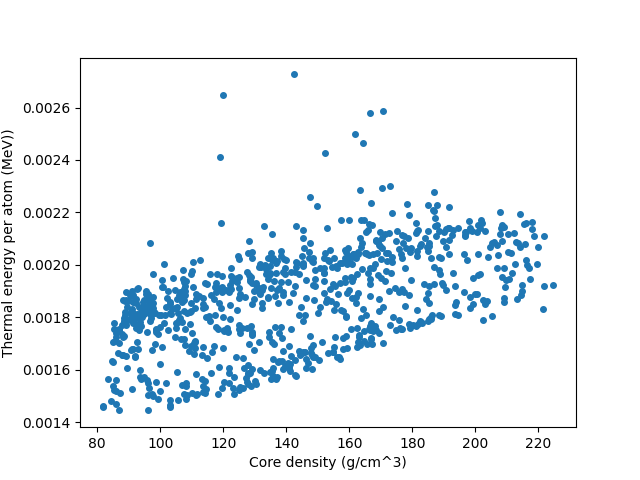

,radius,mass,age,y,z,log_cntr_P,log_cntr_Rho,log_cntr_T,core_radius,H,...,C,N,O,Ne,Mg,core_mass,core_atom_count,per_atom_gravitational_energy,core_average_atomic_mass,per_atom_thermal_energy
source_id,,,,,,,,,,,,,,,,,,,,,
2264752202396093440,0.8196,0.815044,1.114927e+10,0.281967,0.018413,17.371147,2.258739,7.150436,1.171614e+10,0.279520,...,0.000015,0.004711,0.008526,0.001920,0.003754,1.222310e+33,3.339944e+56,0.009543,3.422300,0.001828
2268625472622936832,0.9562,0.906775,9.327484e+09,0.292177,0.023275,17.246639,2.148876,7.093921,1.339443e+10,0.370833,...,0.000015,0.005968,0.011127,0.002476,0.004841,1.418199e+33,4.445199e+56,0.008443,3.223698,0.001605
2265123218851791104,1.0851,0.973777,8.241848e+09,0.297062,0.025601,17.385261,2.202711,7.203433,1.529707e+10,0.318086,...,0.000025,0.006189,0.009230,0.002251,0.004402,2.391247e+33,6.937718e+56,0.013467,3.348630,0.002065
2265273989384251776,0.8704,0.910768,5.179618e+09,0.292491,0.023424,17.209572,2.109893,7.075616,1.222364e+10,0.415997,...,0.000010,0.004442,0.008293,0.001844,0.003606,9.853342e+32,3.294438e+56,0.006026,3.003842,0.001538
2263764664860163712,0.8203,0.866578,5.855245e+09,0.285983,0.020325,17.370696,2.185823,7.193429,1.173956e+10,0.343980,...,0.000020,0.005175,0.008269,0.001958,0.003829,1.039602e+33,3.139927e+56,0.007328,3.233012,0.002018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628698091666157952,1.1401,0.992922,8.352146e+09,0.303118,0.028485,17.230670,2.106653,7.088003,1.670734e+10,0.443743,...,0.000009,0.003584,0.006687,0.001488,0.002909,2.497260e+33,8.669388e+56,0.010762,2.872968,0.001583
4972507840167351936,2.0224,1.355071,3.433462e+09,0.286935,0.020778,17.341847,2.171551,7.172130,2.943687e+10,0.359465,...,0.000021,0.006094,0.010636,0.002429,0.004750,1.586040e+34,4.891600e+57,0.043665,3.250553,0.001921
146821331005982336,1.0464,0.919770,1.091391e+10,0.285220,0.019962,17.285184,2.138655,7.129061,1.553987e+10,0.401341,...,0.000013,0.004393,0.008118,0.001813,0.003545,2.163145e+33,7.091458e+56,0.010613,3.043415,0.001740


In [21]:
%matplotlib widget

data = df
# data = data[data['per_atom_thermal_energy'] > .0032]
data = data[data['H'] > .2]

print(len(data))

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot()
x = (data['per_atom_gravitational_energy'])  # Gravitational energy per atom
y = (data['core_average_atomic_mass'])
z = (data['per_atom_thermal_energy'])
ax.scatter(10 ** data['log_cntr_Rho'], z, s=16)
# ax.set_ylabel('Core radius (cm)')
ax.set_xlabel('Core density (g/cm^3)')
ax.set_ylabel('Thermal energy per atom (MeV))')

plt.show()

data

In [16]:
plt.close('all')